## Homework 9: Hypothesis Testing

## Logistics

**Due date**: The homework is due 11:59 pm on Tuesday, March 18.

You will submit your work on [MarkUs](https://markus.teach.cs.toronto.edu/markus/main/login_remote_auth).
To submit your work:

1. Download this file (`Homework_9.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **hw9** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)

## Introduction

For this week's homework, we will investigate the predominance of coral presence in relationship to temperature. We will analyze data coming from six sites within a coral reef French Polinesia, from 2005 to 2022. Throughout these sites, with a quadrat sampling design along transects, percentage cover of corals, macroalgae, microalgae and sand were estimated across different depths and temperatures.

## Question

_General Question: Do corals prefer warmer temperatures or colder temperatures?_

_Specific Question: When comparing quadrats of high coral percentage and low coral percentage, is there a difference in the mean temperature between the two groups?_

## Learning Objectives

You will be creating and submitting a data story answering a data science question. You will be required to submit your work in the format which has complete sections for *Introduction*, *Data*, *Methods*, *Computation*, and *Conclusion*.

In this homework, you will:

* Create a data story in a notebook exploring the question.
* Work with the Moorea Coral reef long-term ecological research dataset to investigate changes in biodiversity as temperature changes.
* Define a function that resamples from our original dataset and randomly shuffles treatment assignment 
* Create and modify for loops and functions to run sampling simulations
* Visualize and analyze sampling distributions via histograms

# Introduction section

This should introduce the question being explored in a sentence. __(1 mark)__

## Data section

The Data part of your notebook should read the raw data, extract a `DataFrame` containing the important columns, rename the columns, and filter out missing values.

You might find it helpful to name intermediate values in your algorithms. That way you can examine them to make sure they have the type you expect and that they look like what you expect. Very helpful when debugging!

To start, replace the `...` with your student number in the code below.
Then, run the cell.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Please fill in this cell with your student number (as an int)
# Give the following to students
# student_number = ...

# Solution
student_number = 1000000000

assert type(student_number) == int, "Did you fill in the student_number variable correctly?"

## Step 0

Create the following pandas `DataFrame`s:

a. `corals_data`: the `DataFrame` created by reading in the `LTER_data.csv` file.

In [3]:
# SOLUTION
corals_data = pd.read_csv("LTER_data.csv")

corals_data

,Site,Quadrat,Year,Depth metres,Temperature celsius,Sand %,Macroalgae %,Microalgae %,Corals %
0,LTER01,Q1.1,2005,1,27.529318,22.5,0.0,0.0,77.5
1,LTER02,Q1.1,2005,1,27.594212,0.0,0.0,2.6,97.4
2,LTER03,Q1.1,2005,1,NaN,30.1,0.0,36.7,33.2
3,LTER04,Q1.1,2005,1,NaN,21.4,0.0,57.1,21.5
4,LTER05,Q1.1,2005,1,NaN,0.6,0.0,3.6,95.8
...,...,...,...,...,...,...,...,...,...
11785,LTER02,Q5.8,2021,20,28.243200,0.0,2.2,62.2,31.9
11786,LTER03,Q5.8,2021,20,NaN,0.0,21.7,45.6,22.8
11787,LTER04,Q5.8,2021,20,28.271281,0.0,12.3,62.6,21.9
11788,LTER05,Q5.8,2021,20,28.202561,2.8,4.5,84.7,7.3


## Step 1

Apply the following data cleaning operations to `corals_data` to create another pandas `DataFrame` named `corals_clean`. Your `corals_data` should contain the original raw data from reading the `LTER_data.csv` file.

- Convert column data types using `DataFrame.convert_dtypes()`.

- Convert column names to the 'snake case' format using `<columns>.str.lower()`, `<columns>.str.replace()`, and `<columns>.str.strip()`. [Snake cases](https://en.wikipedia.org/wiki/Snake_case) uses fully lowercase letters and underscores instead of spaces. It is the [recommended naming convention](https://peps.python.org/pep-0008/#function-and-variable-names) for Python.  For example, if we have the column name: "Tomo is a Great prof  ", the snake case equivalent would be 'tomo_is_a_great_prof'. Furthermore, we will replace the following symbols to the corresponding symbols/text:
    * " " with "_",
    * "%" to "percent"
    * "metres" to "m"
    * "celsius" to "c"
    * "temperature" to "temp"

    Check that your column names are correct using `list(corals_clean.columns)`.

_**Note**: For this data the missing data has already been converted to `NA`s, so don't need to do any replacing of values. But keep in mind that when working on your final project or with any other future data, you might need a step to convert `-999` (or some other convention) to `NA`s._

In [4]:
# Solution
corals_clean = corals_data.convert_dtypes()

co_columns = corals_clean.columns

co_columns_clean = co_columns.str.lower().str.replace(
    " ", "_").str.replace(
    "%", "percent").str.replace(
    "metres", "m").str.replace(
    "celsius", "c").str.replace(
    "temperature", "temp").str.strip("_")

corals_clean.columns = co_columns_clean

corals_clean

,site,quadrat,year,depth_m,temp_c,sand_percent,macroalgae_percent,microalgae_percent,corals_percent
0,LTER01,Q1.1,2005,1,27.529318,22.5,0.0,0.0,77.5
1,LTER02,Q1.1,2005,1,27.594212,0.0,0.0,2.6,97.4
2,LTER03,Q1.1,2005,1,<NA>,30.1,0.0,36.7,33.2
3,LTER04,Q1.1,2005,1,<NA>,21.4,0.0,57.1,21.5
4,LTER05,Q1.1,2005,1,<NA>,0.6,0.0,3.6,95.8
...,...,...,...,...,...,...,...,...,...
11785,LTER02,Q5.8,2021,20,28.2432,0.0,2.2,62.2,31.9
11786,LTER03,Q5.8,2021,20,<NA>,0.0,21.7,45.6,22.8
11787,LTER04,Q5.8,2021,20,28.271281,0.0,12.3,62.6,21.9
11788,LTER05,Q5.8,2021,20,28.202561,2.8,4.5,84.7,7.3


In [5]:
# Check that you have the correct column names
list(corals_clean.columns)

['site',
 'quadrat',
 'year',
 'depth_m',
 'temp_c',
 'sand_percent',
 'macroalgae_percent',
 'microalgae_percent',
 'corals_percent']

## Step 2

Select the columns relevant to this week's analysis. Those are:

+ `site`
+ `year`
+ `temp_c`
+ `corals_percent`

Name the final `DataFrame` `corals_select_data`.

In [6]:
# Solution
columns = ["site",
           "year",
           "temp_c",
           "corals_percent"]

corals_select_data = corals_clean[columns] 

corals_select_data.head()


,site,year,temp_c,corals_percent
0,LTER01,2005,27.529318,77.5
1,LTER02,2005,27.594212,97.4
2,LTER03,2005,<NA>,33.2
3,LTER04,2005,<NA>,21.5
4,LTER05,2005,<NA>,95.8


## Methods section

Here we are describing all steps of the Computation Section for you.

1. Create a copy of `corals_select_data` named `corals_labelled`; this steps is already written for you. Create a column named `is_corals_percent_gte_50` indicating whether a quadrat is represented by a greater surface area of corals than non-corals in the `corals_labelled` `DataFrame`. Assume a quadrat with __50% or more__ of its surface area composed of coral species is considered a quadrat having a greater surface area of corals.  

    *Hint: Think about what column from `corals_select_data` provides us with this information, and the values in this column corresponding to a 'greater surface area of corals over non-corals'.*

2. Create a function that computes the difference between:

    + the mean temperature of all quadrats with a larger surface area of non-corals; and
    + the mean temperature of all quadrats with a larger surface area of corals. 

    Furthermore, using this function, compute this difference as observed in our data.  

3. Randomly shuffle the labels (values) corresponding to greater or lower coral percent cover. Design a function that re-samples the labels for the column created in 1., and then re-assigns it to that column. In Step 4, we will take multiple random re-samples.

4. Complete a for loop that re-samples our data using the function defined in Step 3, then compute the mean difference temperature between quadrats with greater coral percentage and quadrats with lower coral percentage. 

5. Visualize our results in Step 4, with a histogram. 

6. Calculate the p-value, from our results in Step 4. 

## Computation section


### Step 1: Create a column indicating whether a quadrat has a greater or equal percentage of coral surface area as non-coral surface area


**SOLUTION**

Add a new column to `corals_labelled` named `is_corals_percent_gte_50` that has value `True` if the quadrat has a percentage surface area of corals greater than or equal to 50%, or `False` otherwise.


In [7]:
corals_labelled = corals_select_data.copy() # this creates a copy of corals_select_data
# Write your code below
is_percent_corals_over_50 = corals_select_data["corals_percent"] >= 50.0
corals_labelled["is_corals_percent_gte_50"] = is_percent_corals_over_50

corals_labelled.head()


,site,year,temp_c,corals_percent,is_corals_percent_gte_50
0,LTER01,2005,27.529318,77.5,True
1,LTER02,2005,27.594212,97.4,True
2,LTER03,2005,<NA>,33.2,False
3,LTER04,2005,<NA>,21.5,False
4,LTER05,2005,<NA>,95.8,True


### Step 2: Create a function to calculate mean differences in temperature by group

We will create a *helper function* that computes the difference in mean temperature between quadrats with lower coral surface area and greater coral surface area. A helper function is a function that performs part of the computation of another function. Helper functions are used to make your programs easier to read by giving descriptive names to computations. 

In the following code cell, define a helper function as specified below.

+  Function name: `compute_mean_diff_temperature_by_coral_sa`.
+  Input argument:
    1.  `data`: the `DataFrame` containing information about the coral surface area (`is_corals_percent_gte_50`) AND temperature by quadrat.
+  Tasks: 
    1. Compute the mean temperature of all quadrats with greater surface area of corals based on the value of `is_corals_percent_gte_50`.
    2. Compute the mean temperature of all quadrats with lower surface area of corals based on the value of `is_corals_percent_gte_50`.
    3. Compute the difference in the mean temperatures as the value from step 2 minus the value from step 1.
+  Output: Return the difference in the temperature means quadrats with a lower coral surface area and quadrats with a greater coral surface area.

Finally, calculate the observed difference in mean temperature between quadrats with lower coral surface area and greater coral surface area by applying the function the `corals_labelled` `DataFrame`. The calculated result should be a `float`, and you should name it `observed_diff_in_mean_temperature`.

In [8]:
# Write solution here
# Give students blank code cell, they should be able to do this now
def compute_mean_diff_temperature_by_coral_sa(data):
    
    mean_temp_high_coral_sa = data.loc[
        data["is_corals_percent_gte_50"] == True, "temp_c"].mean()
    
    mean_temp_low_coral_sa = data.loc[
        data["is_corals_percent_gte_50"] == False, "temp_c"].mean()
    
    return mean_temp_low_coral_sa - mean_temp_high_coral_sa


observed_diff_in_mean_temperature = compute_mean_diff_temperature_by_coral_sa(corals_labelled)

# Verify the result
print(type(observed_diff_in_mean_temperature)) # print the data type
observed_diff_in_mean_temperature


<class 'numpy.float64'>


np.float64(-0.06443893039779525)

### Step 3: Write a helper function that shuffles our labels

We will create another helper function that re-shuffles the labels (values) found in the column `is_corals_percent_gte_50`. In the following code cell, define a helper function as specified below.

+  Function name: `shuffle_labels`.
+  Input argument:
    1.  `data`: the `DataFrame` containing information about the coral surface area (`is_corals_percent_gte_50`) AND temperature by quadrat.
+  Tasks:
    1. Shuffle the labelled values in `is_corals_percent_gte_50`.
+  Output: Return the shuffled labelled values. The output will be a pandas `Series`.

In [9]:
# Complete the function body below (replace the ... with Python code).
# Solution
def shuffle_labels(data):
    column = data["is_corals_percent_gte_50"]
    shuffled = column.sample(frac=1, replace=False).reset_index(drop=True)
    return shuffled

### Step 4: Simulating our sample means

Here, we will write code for the machinery of our hypothesis test. Specifically, we will simulate samples under assumption of the null hypothesis - that is, we will generate a sampling distribution of the difference in mean temperature between our two groups of quadrats. 

Write code to accomplish the following:
 + Create a copy of `corals_labelled` named `corals_shuffled_data`; this steps is already written for you. 
 + Initialize a new list that will be used to store the sample test statistics we will compute. Name this list `resample_test_statistics`.
 + In a for loop, re-sample the labels of `is_corals_percent_gte_50` from the `DataFrame` `corals_shuffled_data` 1000 times. Assign these shuffled labels to the column `is_corals_percent_gte_50`.
 + Call the function you created in Step 2 to calculate the difference in mean temperature between quadrats with low and high coral surface area. Name this value `mean_diff`.
 + Append your result, `mean_diff`, above to `resample_test_statistics`.
 + Outside of the for loop, convert `resample_test_statistics` from a list to a `Series`.
 
We will only autotest your final result, `resample_test_statistics`.

In [10]:
# The following line of code uses your student number to set a random seed.
# This ensures that every time you run this cell, you'll get the same result.
# Do not modify this line of code!
np.random.seed(student_number)

corals_shuffled_data = corals_labelled.copy() # this creates a copy of corals_labelled

# Write your code here
# Solution

resample_test_statistics = []

for _ in range(1000):
    
    resampled_labels = shuffle_labels(corals_shuffled_data)
    
    corals_shuffled_data["is_corals_percent_gte_50"]=\
        resampled_labels
    
    resample_test_statistics.append(
        compute_mean_diff_temperature_by_coral_sa(corals_shuffled_data))
    
resample_test_statistics = pd.Series(resample_test_statistics)

# Verify the result
resample_test_statistics

0     -0.009486
1     -0.004217
2     -0.005379
3     -0.005135
4     -0.016262
         ...   
995   -0.006254
996    0.003201
997   -0.001090
998    0.014004
999    0.015579
Length: 1000, dtype: float64

### Step 5: Calculating our p-value

We can calculate a p-value by following the following steps:

+ Take the absolute value of the elements of the `Series` from the previous step. We do this because we want to consider both tails of our sample distribution regardless of the sign of the observed value.
+ Create a boolean `Series` where the entry is `True` if the absolute value of test statistic is geater than or equal to the absolute value of the observed mean difference, as calculated in Step 2.
+ Finally, determine the probability by calculating the proportion of entries that are `True` in `resample_test_statistics_series`. Name your result `p_value`. 

We will only check the name `p_value` in the autotester. 

In [11]:
abs_test_statistics = resample_test_statistics.abs()

abs_observed_diff_in_mean_temperature = abs(observed_diff_in_mean_temperature)

p_value = (abs_test_statistics >= abs_observed_diff_in_mean_temperature).mean()

p_value

np.float64(0.0)

### Step 6: Visualizing our results

We don't need a visualization to calculate our p-value, but it might help in illustrating whether our p-value makes sense. In one plot, plot the following three things: 

+ a histogram plotting the test statistics
+ two vertical lines plotting the observed difference in mean temperature between quadrats of different groups (see lecture)

The plots will be marked for completion - you can decide what parameters you'd like to play with, only the correct data needs to be passed to each plot. __(1 mark)__

np.float64(-0.06443893039779525)

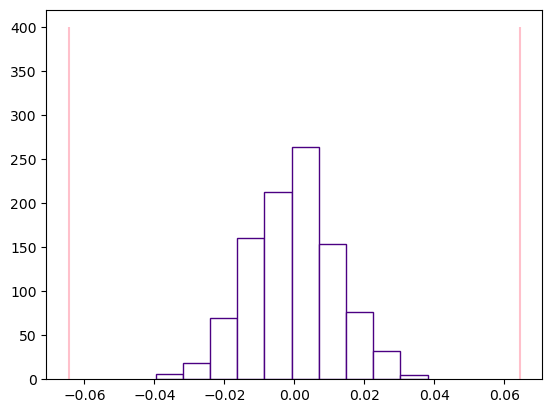

In [12]:
plt.hist(resample_test_statistics, color="white", edgecolor="indigo")
plt.vlines(x=observed_diff_in_mean_temperature, ymin=0, ymax=400, color="pink")
plt.vlines(x=-1*observed_diff_in_mean_temperature, ymin=0, ymax=400, color="pink")
observed_diff_in_mean_temperature

# Conclusion

State the difference in mean temperature between quadrats with high coral surface area and those with low coral surface area. From your results, state the p-value, and give its interpretation. What conclusions can you make from the observed p-value? __(2 marks)__


**Sample Solution**

> The difference in the mean temperature between quadrants with high coral surface area and those with low coral surface area is -0.06444 or 0.06444. The p-value is 0, meaning that there is strong evidence indicating that there is a difference in the mean temperature of quadrats with high coral percentage than those with low coral percentage.
>
> Specifically it looks like areas with higher coral percentages, have a higher mean temperature than areas with lower coral percentages.